In [108]:
import os
import json
import time
import requests
import urllib.parse
from IPython.display import Image, display
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [109]:
#config_file = 'config.json'
#key = json.load(open(config_file))['mdvhwX6Era11JlFA5Mtx9Lar7xnzUxQc_6fuvtQ8p_w']
subscriptionKey = "mdvhwX6Era11JlFA5Mtx9Lar7xnzUxQc_6fuvtQ8p_w"

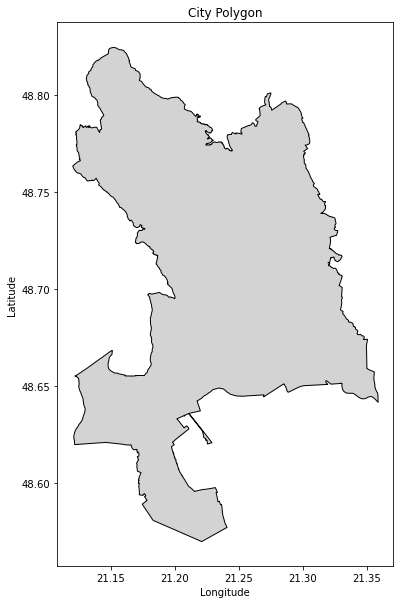

In [110]:
# load the shapefile of the city polygon
# read in the GeoJSON file
#city = json.loads("C:/Users/Magdalenka Kolacik/Jankyna zaloha/2023/Hack Kosice/get_geojson.geojson")
#geojson_file = 'C:/Users/Magdalenka Kolacik/Jankyna zaloha/2023/Hack Kosice/get_geojson.geojson'
city = gpd.read_file("C:/Users/Magdalenka Kolacik/Jankyna zaloha/2023/Hack Kosice/get_geojson.geojson")
matrix = pd.read_excel("C:/Users/Magdalenka Kolacik/Jankyna zaloha/2023/Hack Kosice/DataTypesAzureMap.xlsx")

# create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# plot the city polygon
city.plot(ax=ax, color='lightgrey', edgecolor='black')

# set the title and axis labels
ax.set_title('City Polygon')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# show the plot
plt.show()

In [111]:
addresstoAnalyze = "Hrebendova, 040 11 Luník IX" #Analyzing the Catchment Area for the Starbucks Store (400, Pine Street, Seattle) in Westlake Center, Seattle. 
locationDetails = requests.get("https://atlas.microsoft.com/search/address/json?subscription-key={}&api-version=1.0&query={}".format(subscriptionKey,addresstoAnalyze)).json()
latlong=locationDetails["results"][0]["position"]
currentLocation=[0,0]
currentLocation[0]=latlong["lat"]
currentLocation[1]=latlong["lon"]

In [112]:
print("Lat Long for",addresstoAnalyze,"is",latlong)
walkingTime = 300 # this is 600secs. you can experiment with different values
cTraffic = "true" #you can test how far you can go in current traffic
tMode = "pedestrian" # you can change this to car, bus, pedestrian, bicycle and more. see http://bit.ly/2nGErtX for details 

Lat Long for Hrebendova, 040 11 Luník IX is {'lat': 48.69675, 'lon': 21.22066}


In [113]:
routeRangeResponse = requests.get("https://atlas.microsoft.com/route/range/json?subscription-key={}&api-version=1.0&query={}&timeBudgetInSec={}&traffic={}&travelmode={}".format(subscriptionKey,str(currentLocation[0])+","+str(currentLocation[1]),walkingTime,cTraffic,tMode)).json()

In [114]:
routeRangeResponseF = json.dumps(routeRangeResponse, indent=4)
print(routeRangeResponseF)

{
    "formatVersion": "0.0.1",
    "reachableRange": {
        "center": {
            "latitude": 48.69674,
            "longitude": 21.22067
        },
        "boundary": [
            {
                "latitude": 48.69954,
                "longitude": 21.22062
            },
            {
                "latitude": 48.69946,
                "longitude": 21.22014
            },
            {
                "latitude": 48.69847,
                "longitude": 21.22022
            },
            {
                "latitude": 48.69836,
                "longitude": 21.22004
            },
            {
                "latitude": 48.69821,
                "longitude": 21.21976
            },
            {
                "latitude": 48.69818,
                "longitude": 21.21971
            },
            {
                "latitude": 48.69805,
                "longitude": 21.21954
            },
            {
                "latitude": 48.69757,
                "longitude": 21.2196

In [115]:
polyBounds = routeRangeResponse["reachableRange"]["boundary"]


for i in range(len(polyBounds)):
    coordList = list(polyBounds[i].values())
    coordList[0], coordList[1] = coordList[1], coordList[0]
    polyBounds[i] = coordList

polyBounds.pop()
polyBounds.append(polyBounds[0])

boundsData = {
               "geometry": {
                 "type": "Polygon",
                 "coordinates": 
                   [
                      polyBounds
                   ]
                }
             }

In [116]:
boundsDataF = json.dumps(boundsData, indent=4)
print(boundsDataF)

{
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [
                    21.22062,
                    48.69954
                ],
                [
                    21.22014,
                    48.69946
                ],
                [
                    21.22022,
                    48.69847
                ],
                [
                    21.22004,
                    48.69836
                ],
                [
                    21.21976,
                    48.69821
                ],
                [
                    21.21971,
                    48.69818
                ],
                [
                    21.21954,
                    48.69805
                ],
                [
                    21.21968,
                    48.69757
                ],
                [
                    21.22018,
                    48.69711
                ],
                [
                    21.22036,
  

In [117]:
poiNames = ["ACCESS_GATEWAY",
"ADMINISTRATIVE_DIVISION",
"ADVENTURE_SPORTS_VENUE",
"AGRICULTURE",
"AIRPORT",
"AMUSEMENT_PARK",
"AUTOMOTIVE_DEALER",
"BANK",
"BEACH",
"BUILDING_POINT",
"BUSINESS_PARK",
"CAFE_PUB",
"CAMPING_GROUND",
"CAR_WASH",
"CASH_DISPENSER",
"CASINO",
"CINEMA",
"CITY_CENTER",
"CLUB_ASSOCIATION",
"COLLEGE_UNIVERSITY",
"COMMERCIAL_BUILDING",
"COMMUNITY_CENTER",
"COMPANY",
"COURTHOUSE",
"CULTURAL_CENTER",
"DENTIST",
"DEPARTMENT_STORE",
"DOCTOR",
"ELECTRIC_VEHICLE_STATION",
"EMBASSY",
"EMERGENCY_MEDICAL_SERVICE",
"ENTERTAINMENT",
"EXCHANGE",
"EXHIBITION_CONVENTION_CENTER",
"FERRY_TERMINAL",
"FIRE_STATION_BRIGADE",
"FRONTIER_CROSSING",
"FUEL_FACILITIES",
"GEOGRAPHIC_FEATURE",
"GOLF_COURSE",
"GOVERNMENT_OFFICE",
"HEALTH_CARE_SERVICE",
"HELIPAD_HELICOPTER_LANDING",
"HOLIDAY_RENTAL",
"HOSPITAL_POLYCLINIC",
"HOTEL_MOTEL",
"ICE_SKATING_RINK",
"IMPORTANT_TOURIST_ATTRACTION",
"INDUSTRIAL_BUILDING",
"LEISURE_CENTER",
"LIBRARY",
"MANUFACTURING_FACILITY",
"MARINA",
"MARKET",
"MEDIA_FACILITY",
"MILITARY_INSTALLATION",
"MOTORING_ORGANIZATION_OFFICE",
"MOUNTAIN_PASS",
"MUSEUM",
"NATIVE_RESERVATION",
"NIGHTLIFE",
"NON_GOVERNMENTAL_ORGANIZATION",
"OPEN_PARKING_AREA",
"OTHER",
"PARKING_GARAGE",
"PARK_RECREATION_AREA",
"PETROL_STATION",
"PHARMACY",
"PLACE_OF_WORSHIP",
"POLICE_STATION",
"PORT_WAREHOUSE_FACILITY",
"POST_OFFICE",
"PRIMARY_RESOURCE_UTILITY",
"PRISON_CORRECTIONAL_FACILITY",
"PUBLIC_AMENITY",
"PUBLIC_TRANSPORT_STOP",
"RAILWAY_STATION",
"RENT_A_CAR_FACILITY",
"RENT_A_CAR_PARKING",
"REPAIR_FACILITY",
"RESEARCH_FACILITY",
"RESIDENTIAL_ACCOMMODATION",
"RESTAURANT",
"RESTAURANT_AREA",
"REST_AREA",
"SCENIC_PANORAMIC_VIEW",
"SCHOOL",
"SHOP",
"SHOPPING_CENTER",
"SPORTS_CENTER",
"STADIUM",
"SWIMMING_POOL",
"TENNIS_COURT",
"THEATER",
"TOURIST_INFORMATION_OFFICE",
"TRAFFIC_LIGHT",
"TRAFFIC_SERVICE_CENTER",
"TRAFFIC_SIGN",
"TRAIL_SYSTEM",
"TRANSPORT_AUTHORITY",
"VEHICLE_REGISTRATION",
"TRUCK_STOP",
"VETERINARIAN",
"WATER_SPORT",
"WEIGH_STATION",
"WELFARE_ORGANIZATION",
"WINERY",
"ZOOS_ARBORETA_BOTANICAL_GARDEN",]

In [118]:
matrix

,Scoring_industrial,Scoring_F&B,Scoring_amenities,Category,Categories matching code
0,1,0,0,ACCESS_GATEWAY,"airline access, security gate, station access,..."
1,0,0,1,ADMINISTRATIVE_DIVISION,"province, fourth-order administrative division..."
2,0,1,1,ADVENTURE_SPORTS_VENUE,adventure sports venue
3,0,0,0,AGRICULTURE,"horticulture, primary producer, agriculture, f..."
4,1,0,0,AIRPORT,"private authority, military authority, helipor..."
...,...,...,...,...,...
102,0,1,0,WATER_SPORT,water sport
103,1,0,0,WEIGH_STATION,"weigh scales, weigh station"
104,0,0,1,WELFARE_ORGANIZATION,welfare organization
105,0,1,0,WINERY,winery


In [149]:
n = 0
counting = pd.DataFrame(columns=['Category', 'Count'])
observations = pd.DataFrame(columns=['Category','Name','Latitude','Longitude'])

for n in range(106):
    if n >= len(poiNames):
        break
    poiName = poiNames[n]
    searchPolyResponse = requests.post(url = "https://atlas.microsoft.com/search/geometry/json?subscription-key={}&api-version=1.0&query={}&idxSet=POI&limit=50".format(subscriptionKey, poiName), json = boundsData).json()
    numRes = searchPolyResponse["summary"]["numResults"]
    print("Total Number of "+ poiName +" nearby: ", numRes)
    counting= counting.append({'Category': poiName, 'Count': numRes}, ignore_index=True)    
    print("Here is a list of the Search Results: ")
    for loc in range(len(searchPolyResponse["results"])):
                print(loc+1,". ",searchPolyResponse["results"][loc]["poi"]["name"])
    for loc in range(len(searchPolyResponse["results"])):
        print(loc+1,". ",searchPolyResponse["results"][loc]["poi"]["name"])
        latitude = searchPolyResponse["results"][loc]["position"]["lat"]
        longitude = searchPolyResponse["results"][loc]["position"]["lon"]
        print("Latitude: ", latitude)
        print("Longitude: ", longitude)
        observations = counting.append({'Category': poiName, 'Name': (loc+1,". ",searchPolyResponse["results"][loc]["poi"]["name"]),'Latitude':latitude,'Longitude':longitude}, ignore_index=True)
    
    
        

Total Number of ACCESS_GATEWAY nearby:  0
Here is a list of the Search Results: 
Total Number of ADMINISTRATIVE_DIVISION nearby:  0
Here is a list of the Search Results: 
Total Number of ADVENTURE_SPORTS_VENUE nearby:  0
Here is a list of the Search Results: 
Total Number of AGRICULTURE nearby:  0
Here is a list of the Search Results: 
Total Number of AIRPORT nearby:  0
Here is a list of the Search Results: 
Total Number of AMUSEMENT_PARK nearby:  0
Here is a list of the Search Results: 
Total Number of AUTOMOTIVE_DEALER nearby:  0
Here is a list of the Search Results: 
Total Number of BANK nearby:  0
Here is a list of the Search Results: 
Total Number of BEACH nearby:  0
Here is a list of the Search Results: 
Total Number of BUILDING_POINT nearby:  0
Here is a list of the Search Results: 
Total Number of BUSINESS_PARK nearby:  0
Here is a list of the Search Results: 
Total Number of CAFE_PUB nearby:  0
Here is a list of the Search Results: 
Total Number of CAMPING_GROUND nearby:  0
He

Total Number of RENT_A_CAR_PARKING nearby:  1
Here is a list of the Search Results: 
1 .  Všeobecná ambulancia pre deti a dorast - MUDr. Pavol Štroncer
1 .  Všeobecná ambulancia pre deti a dorast - MUDr. Pavol Štroncer
Latitude:  48.69711
Longitude:  21.2217
Total Number of REPAIR_FACILITY nearby:  0
Here is a list of the Search Results: 
Total Number of RESEARCH_FACILITY nearby:  0
Here is a list of the Search Results: 
Total Number of RESIDENTIAL_ACCOMMODATION nearby:  0
Here is a list of the Search Results: 
Total Number of RESTAURANT nearby:  0
Here is a list of the Search Results: 
Total Number of RESTAURANT_AREA nearby:  0
Here is a list of the Search Results: 
Total Number of REST_AREA nearby:  0
Here is a list of the Search Results: 
Total Number of SCENIC_PANORAMIC_VIEW nearby:  0
Here is a list of the Search Results: 
Total Number of SCHOOL nearby:  1
Here is a list of the Search Results: 
1 .  Materská škola
1 .  Materská škola
Latitude:  48.69757
Longitude:  21.22028
Total 

In [150]:
    print(counting)
    #observations = observations.dropna(subset=['Name'], inplace=True)
    print(observations)

                    Category Count
0             ACCESS_GATEWAY     0
1    ADMINISTRATIVE_DIVISION     0
2     ADVENTURE_SPORTS_VENUE     0
3                AGRICULTURE     0
4                    AIRPORT     0
..                       ...   ...
101               TRUCK_STOP     1
102             VETERINARIAN     0
103              WATER_SPORT     0
104            WEIGH_STATION     2
105     WELFARE_ORGANIZATION     0

[106 rows x 2 columns]
                    Category Count  \
0             ACCESS_GATEWAY     0   
1    ADMINISTRATIVE_DIVISION     0   
2     ADVENTURE_SPORTS_VENUE     0   
3                AGRICULTURE     0   
4                    AIRPORT     0   
..                       ...   ...   
101               TRUCK_STOP     1   
102             VETERINARIAN     0   
103              WATER_SPORT     0   
104            WEIGH_STATION     2   
105            WEIGH_STATION   NaN   

                                                  Name  Latitude  Longitude  
0                    

In [147]:
ranking = pd.merge(counting, matrix, on='Category')

In [128]:
ranking['Industrial_Rank'] = ranking['Scoring_industrial'] * ranking['Count']
ranking['F&B'] = ranking['Scoring_F&B'] * ranking['Count']
ranking['Scoring_amenities'] = ranking['Scoring_amenities'] * ranking['Count']

In [129]:
Industrial_Ranking = ranking['Industrial_Rank'].sum()
Industrial_Ranking = min(Industrial_Ranking/500, 1) * 100   # normalize score to 0-100 range
Industrial_Ranking = min(Industrial_Ranking, 100)   # cap the score at 100

FoodandBeverage_Ranking = ranking['F&B'].sum()
FoodandBeverage_Ranking = min(FoodandBeverage_Ranking/500, 1) * 100   # normalize score to 0-100 range
FoodandBeverage_Ranking = min(FoodandBeverage_Ranking, 100)   # cap the score at 100

Public_Amenities_Ranking = ranking['Scoring_amenities'].sum()
Public_Amenities_Ranking = min(Public_Amenities_Ranking/500, 1) * 100   # normalize score to 0-100 range
Public_Amenities_Ranking = min(Public_Amenities_Ranking, 100)   # cap the score at 100

print("Industrial Ranking is ", Industrial_Ranking)
print("F&B Ranking is ", FoodandBeverage_Ranking)
print("Public Amenities Ranking is ", Public_Amenities_Ranking)



Industrial Ranking is  2.4
F&B Ranking is  0.8
Public Amenities Ranking is  2.6
